In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme()

# Redefining the negative-positive class

## Some data viz and stats

In [21]:
supp_cox_hr = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4.tsv", sep="\t")
supp_cox_hr["Outcome"].unique()

array(['COPD', 'Type 2 diabetes', 'Death', 'Liver disease',
       'Ischaemic heart disease', 'Lung cancer', "Alzheimer's dementia",
       'Ischaemic stroke', 'Systemic lupus erythematosus',
       'Amyotrophic lateral sclerosis', "Parkinson's disease",
       'Rheumatoid arthritis', 'Vascular dementia', 'Prostate cancer',
       'Inflammatory bowel disease', 'Colorectal cancer', 'Endometriosis',
       'Breast cancer', 'Cystitis', 'Multiple sclerosis',
       'Gynaecological cancer', 'Schizophrenia', 'Major depression',
       'Brain/CNS cancer'], dtype=object)

In [9]:
# Read in supp table 4 (or 3, the cox_hr table)
# neuro diseases
neuro_diseases = ["Alzheimer's dementia", "Amyotrophic lateral sclerosis", "Parkinson's disease", "Vascular dementia", "Multiple sclerosis", 'Schizophrenia', 'Major depression', 'Brain/CNS cancer']
disease = "Amyotrophic lateral sclerosis"

supp_cox_hr = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4.tsv", sep="\t")
supp_cox_hr['P.Value'] = supp_cox_hr['P.Value'].str.replace(',', '.').astype(float)
supp_cox_hr['HR'] = supp_cox_hr['HR'].str.replace(',', '.').astype(float)
supp_cox_hr['UCI'] = supp_cox_hr['UCI'].str.replace(',', '.').astype(float)
supp_cox_hr['LCI'] = supp_cox_hr['LCI'].str.replace(',', '.').astype(float)

# Extract all AD genes in table 4
supp_cox_hr["gene"] = supp_cox_hr["Predictor"].apply(lambda x: x.split(".")[0] + "." + x.split(".")[-2])
supp_cox_hr["-logp"] = -np.log(supp_cox_hr["P.Value"] + 1e-60)
supp_cox_hr.head()

,Predictor,Outcome,HR,LCI,UCI,P.Value,N Cases,N Controls,gene,-logp
0,CXCL17.Q6UXB2.OID20622.v1,COPD,2.61,2.49,2.74,0.0,1998,44948,CXCL17.OID20622,138.155106
1,ACY1.Q03154.OID20137.v1,Type 2 diabetes,2.22,2.13,2.31,0.0,2822,43370,ACY1.OID20137,138.155106
2,GDF15.Q99988.OID20251.v1,Type 2 diabetes,2.56,2.46,2.67,0.0,2822,43370,GDF15.OID20251,138.155106
3,PRCP.P42785.OID20337.v1,Type 2 diabetes,2.25,2.16,2.34,0.0,2822,43370,PRCP.OID20337,138.155106
4,NFASC.O94856.OID20634.v1,Type 2 diabetes,2.39,2.29,2.49,0.0,2822,43370,NFASC.OID20634,138.155106


## Count significant genes

In [11]:
# Calculate the number of significant genes for each neurological disease (Bonferroni-corrected)
pval_thres = 3.1e-6

for disease in neuro_diseases:
    supp_cox_hr_sup = supp_cox_hr[supp_cox_hr["Outcome"] == disease]
    num_pos = supp_cox_hr_sup[supp_cox_hr_sup["P.Value"] < pval_thres].shape[0]
    print(f"Under pval < {pval_thres}, number of positive genes for {disease} = {num_pos}")

Under pval < 3.1e-06, number of positive genes for Alzheimer's dementia = 7
Under pval < 3.1e-06, number of positive genes for Amyotrophic lateral sclerosis = 1
Under pval < 3.1e-06, number of positive genes for Parkinson's disease = 26
Under pval < 3.1e-06, number of positive genes for Vascular dementia = 14
Under pval < 3.1e-06, number of positive genes for Multiple sclerosis = 1
Under pval < 3.1e-06, number of positive genes for Schizophrenia = 2
Under pval < 3.1e-06, number of positive genes for Major depression = 1
Under pval < 3.1e-06, number of positive genes for Brain/CNS cancer = 0


In [12]:
# Calculate the number of significant genes for each neurological disease (no Bonferroni-corrected)
pval_thres = 0.05

for disease in neuro_diseases:
    supp_cox_hr_sup = supp_cox_hr[supp_cox_hr["Outcome"] == disease]
    num_pos = supp_cox_hr_sup[supp_cox_hr_sup["P.Value"] < pval_thres].shape[0]
    print(f"Under pval < {pval_thres}, number of positive genes for {disease} = {num_pos}")

Under pval < 0.05, number of positive genes for Alzheimer's dementia = 217
Under pval < 0.05, number of positive genes for Amyotrophic lateral sclerosis = 59
Under pval < 0.05, number of positive genes for Parkinson's disease = 313
Under pval < 0.05, number of positive genes for Vascular dementia = 541
Under pval < 0.05, number of positive genes for Multiple sclerosis = 184
Under pval < 0.05, number of positive genes for Schizophrenia = 531
Under pval < 0.05, number of positive genes for Major depression = 180
Under pval < 0.05, number of positive genes for Brain/CNS cancer = 34


In [17]:
# Calculate the number of significant genes for each neurological disease (FDR)
from scipy import stats

pval_thres = 0.05

for disease in neuro_diseases:
    supp_cox_hr_sup = supp_cox_hr[supp_cox_hr["Outcome"] == disease].copy()
    supp_cox_hr_sup.loc[:, "FDR"] = stats.false_discovery_control(supp_cox_hr_sup["P.Value"].tolist())
    num_pos = supp_cox_hr_sup[supp_cox_hr_sup["FDR"] < pval_thres].shape[0]
    print(f"Under qval < {pval_thres}, number of positive genes for {disease} = {num_pos}")

Under qval < 0.05, number of positive genes for Alzheimer's dementia = 40
Under qval < 0.05, number of positive genes for Amyotrophic lateral sclerosis = 1
Under qval < 0.05, number of positive genes for Parkinson's disease = 134
Under qval < 0.05, number of positive genes for Vascular dementia = 289
Under qval < 0.05, number of positive genes for Multiple sclerosis = 18
Under qval < 0.05, number of positive genes for Schizophrenia = 323
Under qval < 0.05, number of positive genes for Major depression = 7
Under qval < 0.05, number of positive genes for Brain/CNS cancer = 0


In [20]:
# Calculate the number of significant genes for each neurological disease (CI not containing 1)
for disease in neuro_diseases:
    supp_cox_hr_sup = supp_cox_hr[supp_cox_hr["Outcome"] == disease].copy()
    num_pos = supp_cox_hr_sup[(supp_cox_hr_sup["LCI"] > 1.0) | (supp_cox_hr_sup["UCI"] < 1.0)].shape[0]
    print(f"Under CI not containing 1, number of positive genes for {disease} = {num_pos}")

Under CI not containing 1, number of positive genes for Alzheimer's dementia = 188
Under CI not containing 1, number of positive genes for Amyotrophic lateral sclerosis = 46
Under CI not containing 1, number of positive genes for Parkinson's disease = 276
Under CI not containing 1, number of positive genes for Vascular dementia = 509
Under CI not containing 1, number of positive genes for Multiple sclerosis = 169
Under CI not containing 1, number of positive genes for Schizophrenia = 516
Under CI not containing 1, number of positive genes for Major depression = 169
Under CI not containing 1, number of positive genes for Brain/CNS cancer = 30


## Choose the most negative genes to pair with the most positive

In [52]:
supp_cox_hr = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/nature_proteomics_papers/blood_protein_assessment_of_leading_incident_diseases_and_mortality_in_the_UK_Biobank/supp_table_4.tsv", sep="\t")
disease = "Schizophrenia"

supp_cox_hr['P.Value'] = supp_cox_hr['P.Value'].str.replace(',', '.').astype(float)
supp_cox_hr['HR'] = supp_cox_hr['HR'].str.replace(',', '.').astype(float)
supp_cox_hr['UCI'] = supp_cox_hr['UCI'].str.replace(',', '.').astype(float)
supp_cox_hr['LCI'] = supp_cox_hr['LCI'].str.replace(',', '.').astype(float)

supp_cox_hr["gene"] = supp_cox_hr["Predictor"].apply(lambda x: x.split(".")[0] + "." + x.split(".")[-2])
supp_cox_hr["-logp"] = -np.log(supp_cox_hr["P.Value"] + 1e-60)
supp_cox_hr = supp_cox_hr[supp_cox_hr["Outcome"] == disease].drop_duplicates(subset=["gene"])
supp_cox_hr.head()

,Predictor,Outcome,HR,LCI,UCI,P.Value,N Cases,N Controls,gene,-logp
4820,KLK13.Q9UKR3.OID21291.v1,Schizophrenia,2.05,1.56,2.69,2.870000e-07,54,47449,KLK13.OID21291,15.063784
4835,CXCL16.Q9H2A7.OID20282.v1,Schizophrenia,2.02,1.54,2.65,3.280000e-07,54,47449,CXCL16.OID20282,14.930252
5291,TNFRSF10A.O00220.OID20967.v1,Schizophrenia,1.93,1.46,2.54,3.320000e-06,54,47449,TNFRSF10A.OID20967,12.615546
5510,OGN.P20774.OID21123.v1,Schizophrenia,1.90,1.43,2.51,8.170000e-06,54,47449,OGN.OID21123,11.715042
5560,ITGAV.P06756.OID21416.v1,Schizophrenia,0.53,0.40,0.70,9.590000e-06,54,47449,ITGAV.OID21416,11.554790


In [53]:
# Positive genes: Only CI not containing 1.0
mode = "ci"
supp_cox_hr_pos = supp_cox_hr[(supp_cox_hr["LCI"] > 1.0) | (supp_cox_hr["UCI"] < 1.0)]
supp_cox_hr_pos_genes = supp_cox_hr_pos["gene"].tolist()

# Most negative genes based on largest p-value
supp_cox_hr_neg = supp_cox_hr.sort_values(by="P.Value", ascending=False).head(supp_cox_hr_pos.shape[0])
supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()

supp_cox_hr_genes = supp_cox_hr_pos_genes
supp_cox_hr_genes.extend(supp_cox_hr_neg_genes)

In [4]:
# Positive genes: FDR
from scipy import stats

mode = "fdr"

brain_piehl_genes = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/cell_type_specificity/seurat_funcs/markers_wilcox_nomax_brain_general_cell_types.tsv", sep="\t")["gene"].unique().tolist()
pval_thres = 0.05
supp_cox_hr["FDR"] = stats.false_discovery_control(supp_cox_hr["P.Value"])

# Get only genes in single-cell
supp_cox_hr["gene_name"] = supp_cox_hr["gene"].apply(lambda x: x.split(".")[0])
supp_cox_hr_sub = supp_cox_hr[supp_cox_hr["gene_name"].isin(brain_piehl_genes)]
supp_cox_hr_pos = supp_cox_hr_sub[supp_cox_hr_sub["FDR"] < pval_thres]
supp_cox_hr_pos_genes = supp_cox_hr_pos["gene"].tolist()

# Most negative genes based on largest p-value
supp_cox_hr_neg = supp_cox_hr_sub.sort_values(by="P.Value", ascending=False).head(supp_cox_hr_pos.shape[0])
supp_cox_hr_neg_genes = supp_cox_hr_neg["gene"].tolist()

supp_cox_hr_genes = supp_cox_hr_pos_genes
supp_cox_hr_genes.extend(supp_cox_hr_neg_genes)

## Compare these positive and negative genes with genes from Human Protein Atlas

In [54]:
protein_atlas_path = "/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/human_protein_atlas"
gene_types = pd.read_csv(f"{protein_atlas_path}/gene_types.tsv", sep="\t")

In [55]:
# Negative genes composition
neg_genes = [i.split(".")[0] for i in supp_cox_hr_neg_genes]
genes_not_in_atlas = list(set(neg_genes) - set(gene_types["Gene"].tolist()))
print(f"Number of genes not in atlas: {len(genes_not_in_atlas)}")
print(f"Negative gene list = {genes_not_in_atlas}")

neg_gene_types = gene_types[gene_types["Gene"].isin(neg_genes)]
pos_genes = [i.split(".")[0] for i in list(set(supp_cox_hr_genes) - set(supp_cox_hr_neg_genes))]
pos_gene_types = gene_types[gene_types["Gene"].isin(pos_genes)]

Number of genes not in atlas: 5
Negative gene list = ['MICB_MICA', 'WARS', 'IL12A_IL12B', 'EBI3_IL27', 'FUT3_FUT5']


In [56]:
# Negative gene composition
neg_gene_types["type"].value_counts()

type
others_enriched_detected                309
lowly_specific                          129
brain_enhanced                           47
brain_enriched                           15
brain_others_group_enriched              10
brain_lymphoid_marrow_group_enriched      1
Name: count, dtype: int64

In [57]:
# Positive gene composition
pos_gene_types["type"].value_counts()

type
others_enriched_detected                235
lowly_specific                          233
brain_enhanced                           24
brain_enriched                            7
brain_others_group_enriched               7
brain_lymphoid_marrow_group_enriched      2
Name: count, dtype: int64

# Train ElasticNet on only 7 brain cell types

## Input data

In [5]:
print(f"Number of negatives: {len(supp_cox_hr_neg_genes)}")
print(f"All genes: {len(supp_cox_hr_genes)}")

Number of negatives: 32
All genes: 64


### Using seismic's cell type specificity score

### Seurat's FindAllMarkers cell type specificity

In [6]:
### Preprocess 
brain_piehl_sscore = pd.read_csv("/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/cell_type_specificity/seurat_funcs/markers_wilcox_nomax_brain_general_cell_types.tsv", sep="\t")
brain_piehl_sscore = brain_piehl_sscore[["avg_log2FC", "cluster", "gene"]]
brain_piehl_sscore = pd.pivot_table(brain_piehl_sscore, columns=["cluster"], index=["gene"], values="avg_log2FC").fillna(0.0)

sig_genes = [0 if g in list(supp_cox_hr_neg_genes) else 1 for g in supp_cox_hr_genes]
sig_genes_df = pd.DataFrame(sig_genes, index=list(supp_cox_hr_genes), columns=["predictive"]).reset_index()
sig_genes_df["gene"] = sig_genes_df["index"].apply(lambda x: x.split(".")[0])
sig_genes_df = sig_genes_df.drop(columns="index").drop_duplicates(subset="gene", keep="first").set_index("gene")

sscore_sig = pd.merge(brain_piehl_sscore, sig_genes_df, left_index=True, right_index=True)
X = sscore_sig.drop(columns=["predictive"])
y = sscore_sig["predictive"].to_frame()
cell_type_names = sscore_sig.columns.tolist()[:-1]
print(X.shape)
print(f"Number positive: {y.sum().item()}")
print(f"Number negative: {X.shape[0] - y.sum().item()}")

(64, 7)
Number positive: 32
Number negative: 32


## Train Logistic Regression with GridSearchCV

In [80]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler_X = StandardScaler()
X_train_np = scaler_X.fit_transform(X_train)
X_test_np = scaler_X.transform(X_test)

In [63]:
neg_pos_ratio = int((y_train.shape[0] - y_train.sum().item()) / (y_train.sum().item()))
print(neg_pos_ratio)

5


In [68]:
# Calculate the weights
pos_weights = 1
y_train_weights = np.ones_like(y_train)
y_train_weights[y_train == 1] = pos_weights
y_train_weights[y_train == 0] = 1
y_train_weights = np.squeeze(y_train_weights)

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_recall_curve, auc, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

y_train_np = np.squeeze(y_train.to_numpy())
y_test_np = np.squeeze(y_test.to_numpy())

model = LogisticRegression(penalty='elasticnet', class_weight={0: 1, 1: pos_weights}, solver="saga", max_iter=1000, l1_ratio=0.1, C=1.0)

param_grid = {
    'C': [0.01, 0.1, 1, 10], 
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
    "class_weight": [{0: 1.0, 1: 3}, {0: 1.0, 1: 4}, {0: 1.0, 1: 10}]
}
grid_search = GridSearchCV(model, param_grid, scoring='average_precision', cv=5)

#grid_search.fit(X_train_np, y_train_np, **{"sample_weight": y_train_weights})
grid_search.fit(X_train_np, y_train_np)

y_score = grid_search.predict_proba(X_test_np)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
auc_precision_recall = auc(recall, precision)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best model's PR AUC on test set: {auc_precision_recall:.4f}")

Best parameters found: {'C': 0.01, 'class_weight': {0: 1.0, 1: 3}, 'l1_ratio': 0.1}
Best model's PR AUC on test set: 0.0281


In [88]:
## Grab best model
model = grid_search.best_estimator_

y_pred = model.predict(X_test_np)
y_score = model.predict_proba(X_test_np)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
auc_precision_recall = auc(recall, precision)

print(auc_precision_recall)
print(confusion_matrix(y_test_np, y_pred))
print(classification_report(y_test_np, y_pred))

0.028136964175198058
[[207   0]
 [  6   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       207
           1       0.00      0.00      0.00         6

    accuracy                           0.97       213
   macro avg       0.49      0.50      0.49       213
weighted avg       0.94      0.97      0.96       213



/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/conda_env/test-env/envs/scanpy-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: Undefin

## Performance distribution across hyperparams and data folds, ElasticNet

In [20]:
# Calculate the weights
pos_weights = [1.0]
Cs = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]
auprc_df = []
coeff_df = []
N = 5

#
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_recall_curve, auc, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning

kfold = StratifiedKFold(n_splits=N, shuffle=True, random_state=42)
for i, (train_ind, test_ind) in enumerate(kfold.split(X, y)):

    print(f"Working on fold {i}")
    X_train, y_train = X.iloc[train_ind, :], y.iloc[train_ind, :]
    X_test, y_test = X.iloc[test_ind, :], y.iloc[test_ind, :]
    scaler_X = StandardScaler()
    X_train_np = scaler_X.fit_transform(X_train)
    X_test_np = scaler_X.transform(X_test)
    
    for p in pos_weights:
        for C in Cs:
            for l1_ratio in l1_ratios:
    
                y_train_weights = np.ones_like(y_train)
                y_train_weights[y_train == 1] = p
                y_train_weights[y_train == 0] = 1
                y_train_weights = np.squeeze(y_train_weights)
                
                y_train_np = np.squeeze(y_train.to_numpy())
                y_test_np = np.squeeze(y_test.to_numpy())

                model = LogisticRegression(penalty='elasticnet', class_weight={0: 1, 1: p}, solver="saga", max_iter=10000, l1_ratio=l1_ratio, C=C)        
                try:
                    with warnings.catch_warnings():
                        warnings.filterwarnings("error", category=ConvergenceWarning)
                        model.fit(X_train_np, y_train_np, sample_weight=y_train_weights)
                except ConvergenceWarning:
                    print(f"Model at fold={i}, pos_weights={p}, C={C}, and l1_ratio={l1_ratio}")
                    del model
                    continue
        
                y_pred = model.predict(X_test_np)
                y_score = model.predict_proba(X_test_np)[:, 1]
                metric = roc_auc_score(y_test_np, y_score)
                #precision, recall, thresholds = precision_recall_curve(y_test_np, y_score)
                #metric = auc(recall, precision)
                conf_mat = confusion_matrix(y_test_np, y_pred)
                auprc_df.append([i, p, C, l1_ratio, metric, conf_mat[0, 0], conf_mat[0, 1], conf_mat[1, 0], conf_mat[1, 1]])
    
                l = [i, p, C, l1_ratio]
                l.extend(np.squeeze(model.coef_).tolist())
                coeff_df.append(l)
        
                del model

auprc_df = pd.DataFrame(auprc_df, columns=["fold", "pos_weights", "C", "l1_ratio", "AUROC", "TN", "FN", "FP", "TP"])
coeff_cols = ["fold", "pos_weights", "C", "l1_ratio"]
coeff_cols.extend(cell_type_names)
coeff_df = pd.DataFrame(coeff_df, columns=coeff_cols)

Working on fold 0
Working on fold 1
Working on fold 2
Working on fold 3
Working on fold 4


In [21]:
# Since AUPRC calculations for FN=0 and TP=0 and vice versa is not reliable, discard those
auprc_df_good = auprc_df[(~((auprc_df["FN"] == 0) & (auprc_df["TP"] == 0))) & (~((auprc_df["TN"] == 0) & (auprc_df["FP"] == 0)))]
auprc_df_good["id"] = auprc_df_good["fold"].astype(str) + "-" + auprc_df_good["pos_weights"].astype(str) + "-" + auprc_df_good["C"].astype(str) + "-" + auprc_df_good["l1_ratio"].astype(str)

coeff_df["id"] = coeff_df["fold"].astype(str) + "-" + coeff_df["pos_weights"].astype(str) + "-" + coeff_df["C"].astype(str) + "-" + coeff_df["l1_ratio"].astype(str)
coeff_df_good = coeff_df[(coeff_df["id"].isin(auprc_df_good["id"].tolist()))]

print(f"Before removing bad samples = {auprc_df.shape[0]}")
print(f"After removing bad samples = {auprc_df_good.shape[0]}")

Before removing bad samples = 120
After removing bad samples = 75


/tmp/ipykernel_219343/2927181941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auprc_df_good["id"] = auprc_df_good["fold"].astype(str) + "-" + auprc_df_good["pos_weights"].astype(str) + "-" + auprc_df_good["C"].astype(str) + "-" + auprc_df_good["l1_ratio"].astype(str)


In [40]:
# lci<1_uci>1_most_neg, fdr_0.05_most_neg
disease = "Parkinson's_disease"
base_path = f"/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/seismic_uk_biobank_ppp_bin_new/{disease}"
unique_name = "lci<1_uci>1_most_neg"

auprc_df_good = pd.read_csv(f"{base_path}/auroc_{unique_name}.tsv", sep="\t")
coeff_df_good = pd.read_csv(f"{base_path}/coeff_{unique_name}.tsv", sep="\t")

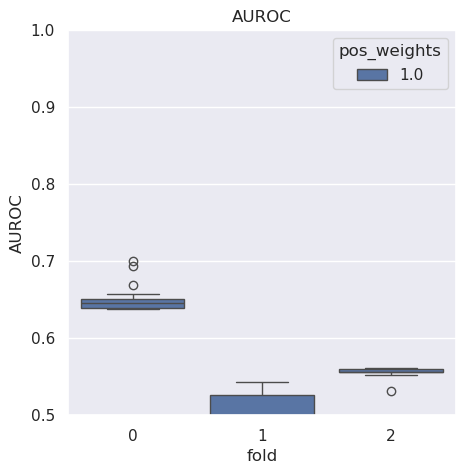

In [41]:
plt.figure(figsize=(5, 5))
sns.boxplot(auprc_df_good, x="fold", y="AUROC", hue="pos_weights")
plt.ylim([0.5, 1.0])
plt.title("AUROC")
plt.show()

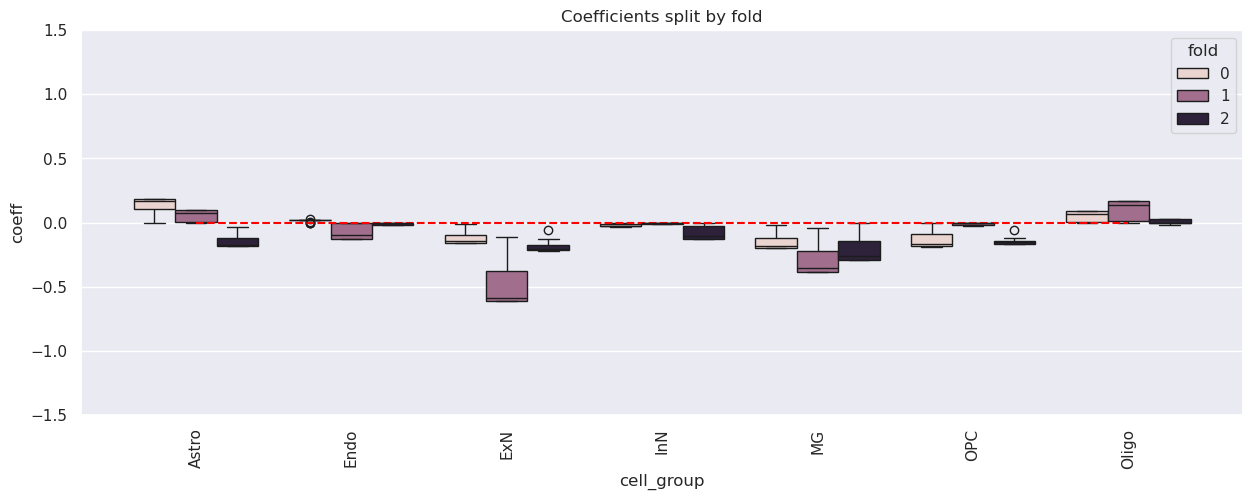

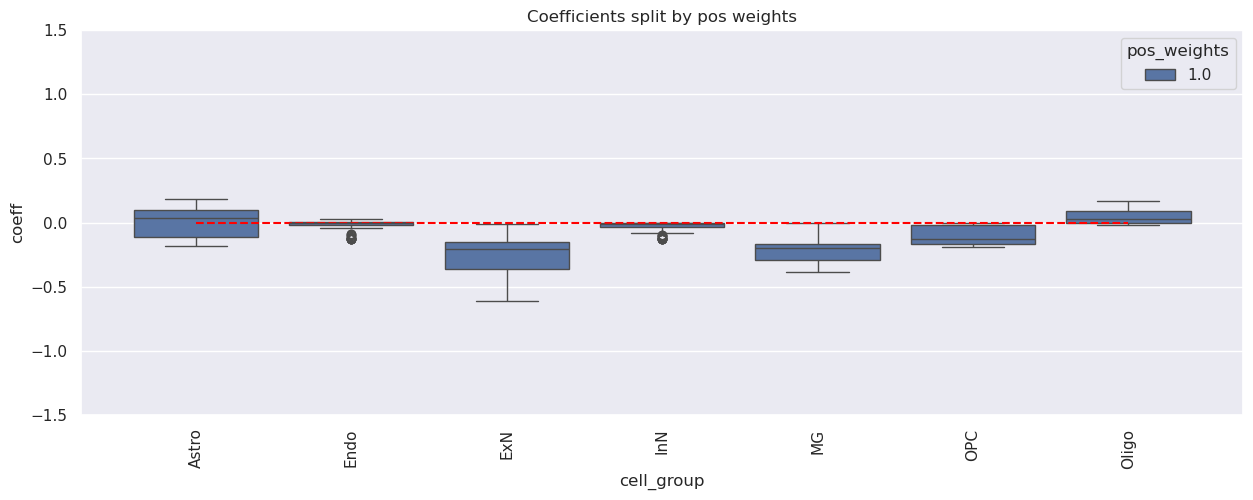

In [42]:
coeff_dfd = coeff_df_good.drop(columns=["C", "l1_ratio", "pos_weights", "id"])
coeff_dfm = pd.melt(coeff_dfd, id_vars=["fold"]).rename(columns={"variable": "cell_group", "value": "coeff"})
plt.figure(figsize=(15, 5))
sns.boxplot(coeff_dfm, x="cell_group", y="coeff", hue="fold")
plt.plot([0]*7, color="red", linestyle="dashed")
plt.xticks(rotation=90)
plt.ylim([-1.5, 1.5])
plt.title("Coefficients split by fold")
plt.show()


coeff_dfd = coeff_df_good.drop(columns=["C", "l1_ratio", "fold", "id"])
coeff_dfm = pd.melt(coeff_dfd, id_vars=["pos_weights"]).rename(columns={"variable": "cell_group", "value": "coeff"})
plt.figure(figsize=(15, 5))
sns.boxplot(coeff_dfm, x="cell_group", y="coeff", hue="pos_weights")
plt.plot([0]*7, color="red", linestyle="dashed")
plt.xticks(rotation=90)
plt.ylim([-1.5, 1.5])
plt.title("Coefficients split by pos weights")
plt.show()

In [64]:
base_path = f"/sc/arion/projects/DiseaseGeneCell/Huang_lab_project/BioResNetwork/Phuc/projects/Alzheimer/piehl_2022_gazestani_2023_integrative/results/data/seismic_uk_biobank_ppp_bin_new/{disease.replace(' ', '_')}"
os.makedirs(base_path, exist_ok=True)

if mode == "ci":
    unique_name = "lci<1_uci>1_most_neg"
elif mode == "fdr":
    unique_name = "fdr_0.05_most_neg"

auprc_df_good.to_csv(f"{base_path}/auroc_{unique_name}.tsv", sep="\t", index=False)
coeff_df_good.to_csv(f"{base_path}/coeff_{unique_name}.tsv", sep="\t", index=False)

In [48]:
mode

'fdr'